In [1]:
%matplotlib inline
import numpy as np                  # Numeric Processing
import matplotlib.pyplot as plt     # Graphs, Visuals
from cvxopt import matrix, solvers  # Quadratic Program Solver

## Problem Description and Definitions

Consider a set of data, $x \in \mathcal{X}$ that has an associated binary label, $y_i \in \{\pm 1\}$. It is desired to generalize labels to data in $\mathcal{X}$ where a label is not given. Accordingly, the data with labels can be seen as a training set to use some similarity in $\mathcal{X}$ and in $\{\pm 1\}$ to predict labels for data without them. 

Consider a *similarity measure*,

\begin{equation}
k: \mathcal{X} \times \mathcal{X} \rightarrow \mathbb{R}
\end{equation}

A symmetric property is intuitive as there is no difference between two points withrespect to the order in which they are considered. A *canonical dot product* can serve as this similarity measure

\begin{equation}
k(x, x') = \langle \mathbf x, \mathbf x' \rangle = \sum_{i=1}^{N} [\mathbf x]_i [\mathbf x']_i.
\end{equation}

Not all observations of $x$ support a dot product operations, so to describe in the problem with suitable generality, an additional transformation needs to be carried out in order to represent the problem in some *dot product space* $\mathcal{H}$. Use the map

\begin{equation}
\Phi : \mathcal X \rightarrow \mathcal H
\end{equation}

This space $\mathcal H$ that supports a similarity measure is called a *feature space*.

## Hyperplane Classifier

A hyperplane classifier is a classifier whose decision boundary is a hyperplane. Given a normal vector $\mathbf w$ and offset $b$, the hyperplane in some dot product space $\mathcal H$ is,

\begin{equation}
\langle \mathbf w, \mathbf x \rangle + b = 0
\end{equation}

The *decision function*, $f: \mathbf x \rightarrow y$, then, is

\begin{equation}
f(\mathbf x) = \text{sgn}(\langle \mathbf w, \mathbf x \rangle + b)
\end{equation}

Given a set of training points that are *linearly separable*, it is desired to find a $\mathbf w$ and $b$ that describes an optimal hyperplane, such that the *empirical error* is minimum. The optimal hyperplane can be described as the plane with the maximum separation from a point on the plane and the training data points.

\begin{equation}
\underset{\mathbf{w} \in \mathcal{H}, b \in \mathbb{R}}{\operatorname{max}} \min \left\{\left\|\mathbf{x}-\mathbf{x}_{i}\right\| | \mathbf{x} \in \mathcal{H},\langle\mathbf{w}, \mathbf{x}\rangle+ b=0, i=1, \ldots, m\right\}
\end{equation}

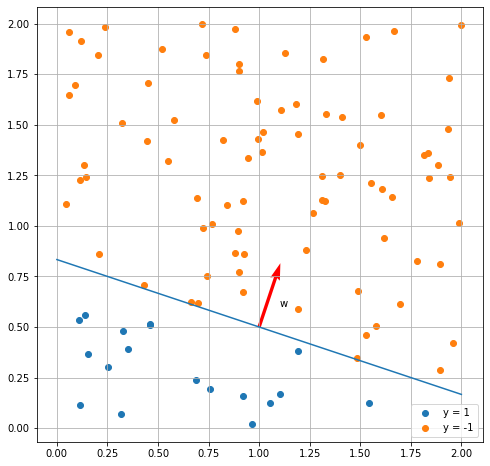

In [2]:
N = 100        # Number of Points
w = [1, 3]    # Hyperplane normal
b = -2.5      # Offset

# Observations
x = np.random.rand(2, N)*2

# Labels (Decision Function)
labels = w[0]*x[0,:]+w[1]*x[1,:] + b < 0 # Hyperplane Inequality
y = np.array(list(map(lambda x: int(x)*2 - 1, labels))) # Decision function

# Plot Training Data
plt.figure(figsize=(8,8))
plt.scatter(x[0, y==1], x[1, y==1])
plt.scatter(x[0, y==-1], x[1, y==-1])
plt.legend(['y = 1', 'y = -1'])

# Plot Linear Separator
xx = np.linspace(0, 2, 5)
yy = (-w[0]*xx - b)/w[1]
plt.plot(xx, yy)

# Plot hyperplane normal vector
origin = xx[np.size(xx) // 2], yy[np.size(xx) // 2]
plt.quiver(*origin, w[0], w[1], color=['r','b','g'], scale=21)
plt.text(origin[0]+.1, origin[1]+.1, 'w')
plt.axis('equal')
plt.grid()
plt.show()

## Constrained Optimization Problem

### Definition and Formulation

Constrained optimization deals with optimizing an objective function, $\tau(\boldsymbol x)$, with respect to some variables which are constrained by some equality or inequality constraints. 

\begin{equation}
\begin{array}{rl}{\min } & {\tau(\mathbf{x})} \\ {\text { subject to }} & {g_{i}(\mathbf{x})=c_{i} \quad \text { for } i=1, \ldots, n} \\ {} & {h_{j}(\mathbf{x}) \geqq d_{j} \quad \text { for } j=1, \ldots, m}\end{array}
\end{equation}

For the hyperplane classifier, we have only one inequality constraint,

\begin{equation}
\begin{array}{l}{\underset{\mathbf{w} \in \mathcal{H}, b \in \mathbb{R}}{\operatorname{minimize}} \tau(\mathbf{w})=\frac{1}{2}\|\mathbf{w}\|^{2}} \\ {\text { subject to } y_{i}\left\langle\left\langle\mathbf{w}, \mathbf{x}_{i}\right\rangle+ b\right) \geq 1 \text { for all } i=1, \ldots, m}\end{array}
\end{equation}

### Solution via Lagrange Multipliers

A constrained problem of this nature can be converted to a form where the derivative test of an unconstrained problem can be applied. Consider a single constraint

\begin{equation}
\begin{array}{l}{\text { max } f(x, y)} \\ {\text { subject to } g(x, y)=0}\end{array}
\end{equation}

A *Lagrange function* can be created as

\begin{equation}
\mathcal{L}(x, y, \lambda)=f(x, y)-\lambda g(x, y)
\end{equation}

where $\lambda$ is the *Lagrange multiplier*. In this case, $x$ and $y$ are known as *primal variables*, whereas $\lambda$ is a *dual variable*. This permits the derivative test

\begin{equation}
\nabla_{x, y, \lambda} \mathcal{L}(x, y, \lambda)=0 \Longleftrightarrow\left\{\begin{array}{l}{\nabla_{x, y} f(x, y)=\lambda \nabla_{x, y} g(x, y)} \\ {g(x, y)=0}\end{array}\right.
\end{equation}

In the case of the hyperplane classifier, the Lagrange function is

\begin{equation}
L(\mathbf{w}, b, \boldsymbol{\alpha})=\frac{1}{2}\|\mathbf{w}\|^{2}-\sum_{i=1}^{m} \alpha_{i}\left(y_{i}\left(\left\langle\mathbf{x}_{i}, \mathbf{w}\right\rangle+ b\right)-1\right)
\end{equation}

Note that there is a Lagrange multiplier for each dimension of the constraint equality. When the constraint is violated, it is always possible to increase $\mathcal{L}$. Solve for the critical points

\begin{equation}
\nabla \mathcal{L}=\left[\begin{array}{c}{ \frac{\partial \mathcal{L}}{\partial \mathbf w}}  \\ {\frac{\partial \mathcal{L}}{\partial b}}\end{array}\right] = \boldsymbol 0
\end{equation}

meaning that

\begin{equation}
\begin{aligned}
{\sum_{i=1}^{m} \alpha_{i} y_{i} = 0} \\  {\mathbf{w} = \sum_{i=1}^{m} \alpha_{i} y_{i} \mathbf{x}_{i}}
\end{aligned}
\end{equation}

By substitution,

\begin{equation}
\begin{array}{l}{\underset{\alpha \in \mathbb{R}^{m}}{\operatorname{maximize}} W(\boldsymbol{\alpha})=\sum_{i=1}^{m} \alpha_{i}-\frac{1}{2} \sum_{i, j=1}^{m} \alpha_{i} \alpha_{j} y_{i} y_{j}\left\langle\mathbf{x}_{i}, \mathbf{x}_{j}\right\rangle} \\ {\text { subject to } \alpha_{i} \geq 0 \text { for all } i=1, \ldots, m \text { and } \sum_{i=1}^{m} \alpha_{i} y_{i}=0}\end{array}
\end{equation}

This expression can be solved as a quadratic programming problem.

### Quadratic Programming Problem

The *quadratic program* assumes the form

\begin{equation}
\begin{aligned} \min _{x} & \frac{1}{2} x^{\top} P x+q^{\top} x \\ \text { subject to } & G x \preceq h \\ & A x=b \end{aligned}
\end{equation}

Re-expressing the hyperplane classifier in this form allows it to be put into common quadratic problem solvers (CVXOPT in this case). Note that the standard form minimizes the expression, so the terms need to be inverted.

Define a vector of $M$ ones as $\mathbb{1}_M \in \mathbb{R}^{M \times 1}$. The matrices are

\begin{equation}
\begin{cases}
\mathbf q = -\mathbb{1}_M \\
\mathbf P_{i, j} = y_i y_j \langle \mathbf x_i, \mathbf x_j \rangle \\
\mathbf G = -I_M \\
b = 0 \\
\mathbf A = y^T
\end{cases}
\end{equation}

In [6]:
# number of data points
m = np.shape(x)[1]

# Put into common matrix form for QP solver
# a matrix() conversion is necessary (see https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf)
q = matrix(-np.ones((m, 1)), tc='d')
P = np.zeros((m, m))

for i in range(0, m):
    for j in range(0, m):
        P[i, j] = y[i]*y[j]*np.dot(x[:, i],x[:, j])
        
P = matrix(P, tc='d')
G = matrix(-np.eye(m), tc='d')
h = matrix(np.zeros((m, 1)), tc='d')
bb = matrix(0, tc='d')
A = np.array(y, ndmin=2)
A = matrix(A, tc='d')

# Run solver      
print("Running CVXOPT QP Solver...")
sol = solvers.qp(P, q, G, h, A, bb)
alpha = np.array(sol['x'])

Running CVXOPT QP Solver...
     pcost       dcost       gap    pres   dres
 0: -2.7791e+01 -5.9399e+01  4e+02  2e+01  2e+00
 1: -6.7927e+01 -7.9173e+01  2e+02  9e+00  1e+00
 2: -1.5957e+02 -1.6996e+02  2e+02  9e+00  1e+00
 3: -7.9036e+02 -7.6919e+02  2e+02  8e+00  9e-01
 4: -8.7161e+02 -8.4626e+02  3e+02  8e+00  9e-01
 5: -1.0594e+03 -1.0229e+03  5e+02  8e+00  9e-01
 6: -9.3850e+02 -9.5891e+02  8e+02  6e+00  6e-01
 7: -6.5930e+02 -7.1802e+02  3e+02  1e+00  1e-01
 8: -5.8695e+02 -5.8889e+02  3e+00  6e-03  7e-04
 9: -5.8718e+02 -5.8720e+02  3e-02  6e-05  7e-06
10: -5.8718e+02 -5.8718e+02  3e-04  6e-07  7e-08
11: -5.8718e+02 -5.8718e+02  3e-06  6e-09  7e-10
Optimal solution found.


Angle Between True w and Solved w: 0.29457370916903874 (deg)


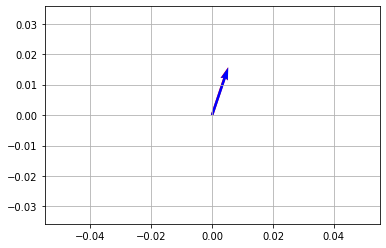

In [5]:
# Recover the w, check that its direction is parallel to the original
w_r = 0
for obs, idx in zip(x.T, range(0, m)):
    w_r += alpha[idx]*y[idx]*obs
    
w_r /= np.linalg.norm(w_r) 
w_r *= np.linalg.norm(w)

angle_between = np.arccos(np.dot(w, w_r)/(np.sqrt(np.dot(w_r, w_r))*np.sqrt(np.dot(w,w))))
if angle_between > np.pi/2:
    w_r *= -1
    angle_between = np.pi - angle_between
print('Angle Between True w and Solved w: %s (deg)' % str(angle_between*180/np.pi))

# Plot Training Data
plt.figure()
# Plot hyperplane normal vector
origin = [[0], [0]]
plt.quiver(*origin, [w[0], w_r[0]], [w[1], w_r[1]], color=['r','b','g'], scale=21)
#plt.text(1, 0, 'w')
#plt.text(w_r[0], w[1], 'w (solved)')
plt.axis('equal')
plt.grid()
plt.show()